<a href="https://colab.research.google.com/github/munizcm/Imersao_Dados/blob/main/ImersaoDados_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 03 - Correlações, causalidade e relações entre os genes


* Importando os dadoss

In [ ]:
import pandas as pd

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')


In [ ]:
mapa = {"droga":"composto"} 
dados.rename(columns= mapa, inplace = True)

In [ ]:
dados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


* Vamos começar a relacionar esses dados

Vamos começar relacionando nossos tipos de tratamento. 
Quais informações seriam úteis relacionar?
Lembrando que tratamento é um dado categórico

Uma forma de relacionar dados categóricos é através da avaliação de suas proporções.

* Vamos fazer uma tabela de frequência com esses dados.

In [ ]:
pd.crosstab(dados["dose"], dados["tempo"])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


Precisamos colocar "[dados["dose"], dados["tempo"]]" entre colchetes, uma vez que queremos fixá-las como coluna e indicar nas linhas a quantidades delas por tratamento

In [ ]:
pd.crosstab([dados["dose"], dados["tempo"]], dados["tratamento"])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

Utilizando o argumento "normalize = True" os valores retornados na tabela é referente a frequencia com que cada tratamento aparece em relação a todo o experimento 

In [ ]:
pd.crosstab([dados["dose"], dados["tempo"]], dados["tratamento"], normalize=True)

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.012640   0.150542
     48         0.014403   0.168430
     72         0.012892   0.151172
D2   24         0.012808   0.150374
     48         0.012808   0.150794
     72         0.012808   0.150332

Utilizando o argumento "normalize = "index"" os valores retornados na tabela é referente a frequencia com que cada tratamento aparece em relação a cada categoria avaliada

In [ ]:
pd.crosstab([dados["dose"], dados["tempo"]], dados["tratamento"], normalize="index")

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

Nos exemplos anteriores avaliamos a frequência de cada tratamento. Porém, quando queremos avaliar o efeito dele sobre determinado gene, incluimos a variavel de interesse no argumento values. Já no argumento aggfunc adicionamos que tipo de informaçao queremos da nossa variável de interesse. 

In [ ]:
pd.crosstab([dados["dose"], dados["tempo"]], dados["tratamento"], values = dados["g-0"], aggfunc = "mean")

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

Quando queremos avaliar duas variáveis contínuas podemos utilizar um scaterplot. 

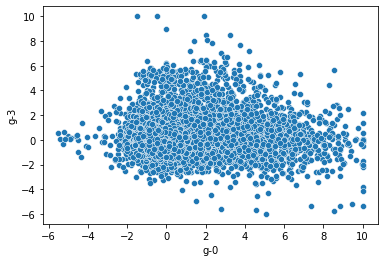

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x= "g-0", y = "g-3", data = dados)

In [ ]:
dados[["g-0", "g-3"]]

,g-0,g-3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


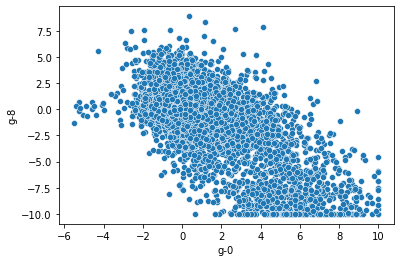

In [ ]:
sns.scatterplot(x= "g-0", y = "g-8", data = dados)

* Criando uma linha de tendencia para essa relação

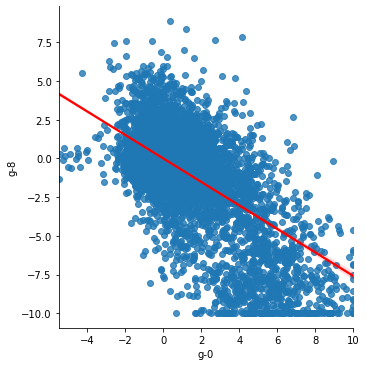

In [ ]:
sns.lmplot(x= "g-0", y = "g-8", data = dados, line_kws = {"color": "red"})

Nessa relação avaliada a cima, estamos avaliando TODOS os dados em relacao a todos os tratamentos. Porém a abaixo vamos avaliar essa relação nos subgrupos.

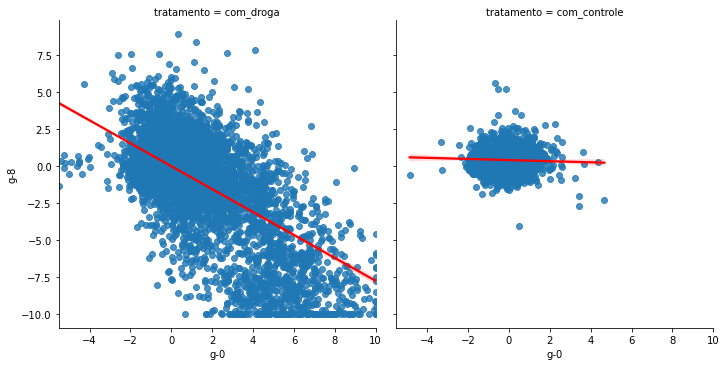

In [ ]:
sns.lmplot(x= "g-0", y = "g-8", data = dados, line_kws = {"color": "red"}, col="tratamento")

Nos gráficos a cima, podemos avaliar que os grupos com_droga e com_controle possuem diferenças quanto a relação da expressao dos genes 1 e genes 8. Porém, no tratamento com_droga, ainda podemos filtrar mais as informações, porque nela está contida diversos tipos de drogas, tempo e etc. 

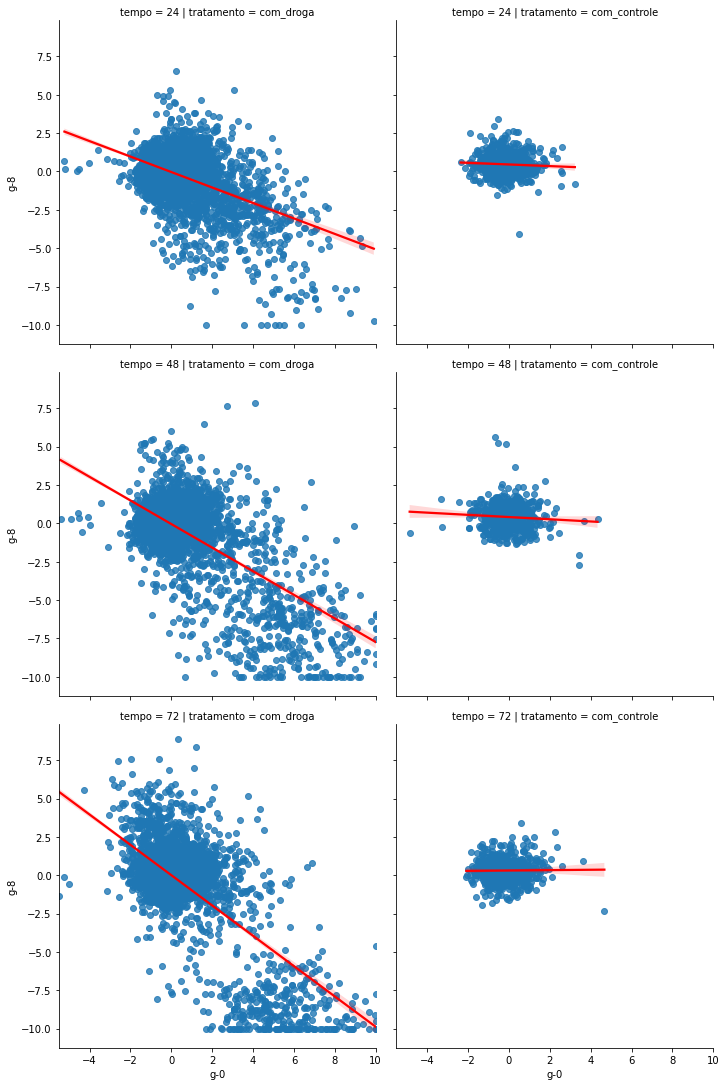

In [ ]:
sns.lmplot(x= "g-0", y = "g-8", data = dados, line_kws = {"color": "red"}, col="tratamento", row="tempo")

Ao explorar as relações a cima, podemos oberservar que a relação continuou estável, ao longo do tempo para o tratamento. Isso é algo esperado. Porém para o tratamento com drogas, parece que quanto mais tempo de exposicao com as drogas, maior é a forca de correlacao entre as médias de expressao dos genes. Isso porque as retas parecem ficar mais inclinadas.

In [ ]:
dados.loc[:, "g-0":"g-771"].corr()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0

* Criando uma matriz de calor de correlação entre as variáveis

https://seaborn.pydata.org/examples/many_pairwise_correlations.html

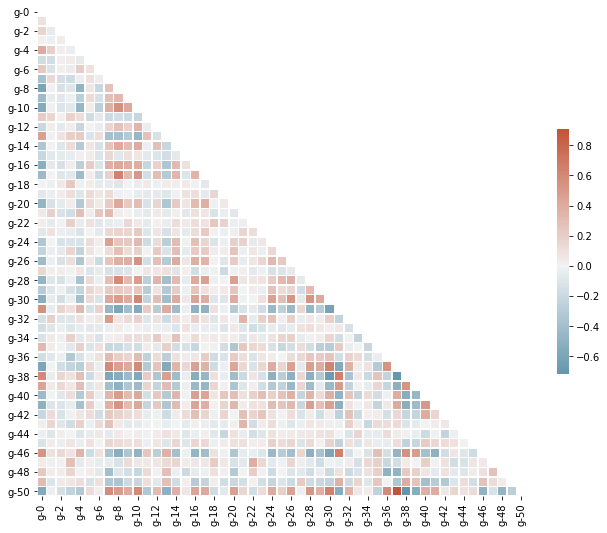

In [ ]:
import numpy as np
# Compute the correlation matrix
corr = dados.loc[:, "g-0":"g-50"].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Esse gráfico é normalmente utilizado para encontrar relações que chamam a atenção. Como a relação do g-37 e g-50.

In [ ]:
corr_celular = dados.loc[:, "c-0":"c-50"].corr()

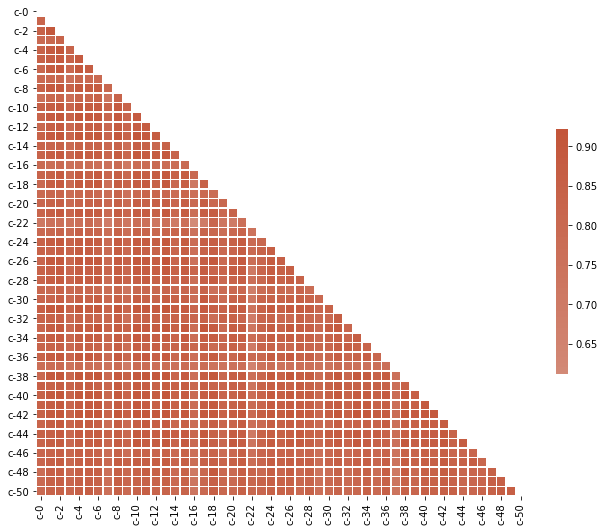

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Desafios da aula 03
### Desafio 01: Criar tabelas de frequência utilizando a função pandas.groupby()
### Desafio 02: Como normalizar a coluna? Deixar a soma das frequencias da coluna igual a 1 
### Desafio 03: Na função pd.crosstab, explorar outros agregadores da função, além da média
### Desafio 04: Explorar o melt.
### Desafio 05: Calcular e analisar a correlação G e C. Refletir sobre os efeitos biológicos
### Desafio 06: Estudar o código que plota a matriz de correlação (heatmap) 

In [ ]:
# Desafio 01 
dados.groupby(["dose","tempo", "tratamento"])["tratamento"].size()

dose  tempo  tratamento  
D1    24     com_controle     301
             com_droga       3585
      48     com_controle     343
             com_droga       4011
      72     com_controle     307
             com_droga       3600
D2    24     com_controle     305
             com_droga       3581
      48     com_controle     305
             com_droga       3591
      72     com_controle     305
             com_droga       3580
Name: tratamento, dtype: int64

In [ ]:
dados.groupby(["dose","tempo", "tratamento"])["g-0"].mean()

dose  tempo  tratamento  
D1    24     com_controle   -0.251760
             com_droga       0.367996
      48     com_controle   -0.122773
             com_droga       0.412469
      72     com_controle   -0.295271
             com_droga       0.286250
D2    24     com_controle    0.010754
             com_droga       0.115253
      48     com_controle    0.013174
             com_droga       0.214480
      72     com_controle    0.070250
             com_droga       0.253439
Name: g-0, dtype: float64

In [ ]:
dados.groupby(["dose","tempo", "tratamento"])["tratamento"].count().unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

A função unstack() desempilha os dados, transformando no dataframe a cima. Pra mais infos: https://www.w3resource.com/pandas/dataframe/dataframe-unstack.php

In [ ]:
#Desafio 02
dados.groupby(["dose","tempo", "tratamento"])["tratamento"].count().unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

No Argumento "normalize" ao inves de utilizar "index", utiliza-se "columns"

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

In [ ]:
#Desafio 3 
pd.crosstab([dados["dose"], dados["tempo"]], dados["tratamento"], values = dados["g-0"], aggfunc = "mean")

No site, podemos ter algumas informações sobre a função pd.crosstab: https://www.dataindependent.com/pandas/pandas-cross-tab/
* aggfunc –Abreviação de função agregada, é assim que você resumirá seus valores. Freqüentemente, isso será soma ou média. Os mais comumente usados ​​incluem: mínimo, máximo, média, soma, desvio padrão ou especificando seu próprio.

In [ ]:
#Mínimo
pd.crosstab([dados["dose"], dados["tempo"]], dados["tratamento"], values = dados["g-0"], aggfunc = "min")

tratamento  com_controle  com_droga
dose tempo                         
D1   24           -2.370     -5.183
     48           -3.276     -5.420
     72           -2.086     -5.261
D2   24           -2.135     -5.233
     48           -4.859     -4.567
     72           -1.909     -5.513

In [ ]:
#Máximo
pd.crosstab([dados["dose"], dados["tempo"]], dados["tratamento"], values = dados["g-0"], aggfunc = "max")

tratamento  com_controle  com_droga
dose tempo                         
D1   24            3.226      9.908
     48            3.423     10.000
     72            2.584      9.355
D2   24            2.601      7.167
     48            4.335     10.000
     72            4.670     10.000

In [ ]:
#Soma
pd.crosstab([dados["dose"], dados["tempo"]], dados["tratamento"], values = dados["g-0"], aggfunc = "sum")

tratamento  com_controle  com_droga
dose tempo                         
D1   24         -75.7799  1319.2648
     48         -42.1113  1654.4150
     72         -90.6483  1030.5010
D2   24           3.2800   412.7202
     48           4.0180   770.1980
     72          21.4262   907.3112

In [ ]:
#Desvio padrão
import numpy as np
pd.crosstab([dados["dose"], dados["tempo"]], dados["tratamento"], values = dados["g-0"], aggfunc = np.std)

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.751395   1.461954
     48         0.853396   1.693903
     72         0.769294   1.458600
D2   24         0.836626   1.044999
     48         0.836845   1.315476
     72         0.878041   1.451532

In [ ]:
#Desafio 04

O pandas.melt é utilizado para agregar os valores de várias colunas en uma só. Isso é necessário para algumas análises. 

In [ ]:
data_melt = pd.melt(dados, ['id', 'tempo', 'dose', 'composto', 'tratamento'])
data_melt.head()

,id,tempo,dose,composto,tratamento,variable,value
0,id_000644bb2,24,D1,b68db1d53,com_droga,g-0,1.0620
1,id_000779bfc,72,D1,df89a8e5a,com_droga,g-0,0.0743
2,id_000a6266a,48,D1,18bb41b2c,com_droga,g-0,0.6280
3,id_0015fd391,48,D1,8c7f86626,com_droga,g-0,-0.5138
4,id_001626bd3,72,D2,7cbed3131,com_droga,g-0,-0.3254
